**MIMO System Simulation**

*Project2: A 4X4 MIMO system capacity is found by allocating equal power, optimal power using water filling
algorithm and plotted the capacity for optimal power allocation, equal power vs SNR using Python*

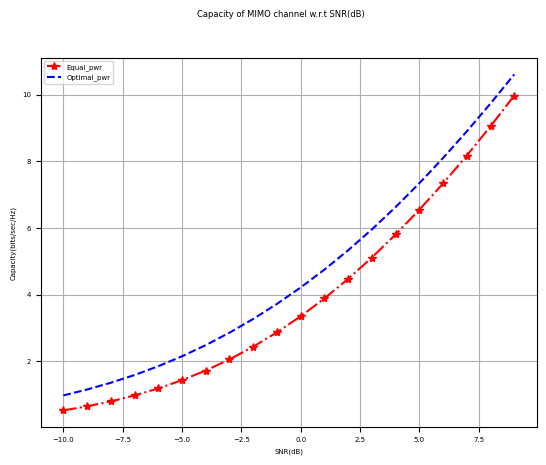

In [1]:
import numpy as np
import numpy.linalg as nl
import numpy.random as nr
import matplotlib.pyplot as plt

#Function for Equal power allocation to all channels
def cap_eq_pwr(H, SNR):
    U,S,V = nl.svd(H, full_matrices= False);
    Nt = len(S);
    cap = sum(np.log2(1+S[0:Nt]**2*SNR/Nt));
    return cap

#Function for optimal power allocation
def cap_opt_pwr(H, SNR):
    U,S,V = nl.svd(H, full_matrices= False);
    Nt = len(S);
    cap = 0;
    while not cap:
        one_by_lam = (SNR + sum(1/S[0:Nt]**2))/Nt
        Pn = one_by_lam - (1/S[Nt-1]**2)
        if Pn >= 0:
            opt_P = one_by_lam - 1/S[0:Nt]**2;
            cap = sum(np.log2(1+ S[0:Nt]**2*opt_P));
        elif Pn < 0:
            Nt = Nt-1;
    return cap
#varying SNR from -10dB TO 10dB
SNRdB = np.arange(-10,10,1);
SNR = 10**(SNRdB/10);
Nr= 4;Nt= 4;n_blocks = 10000;#Considering 4X4 MIMO channel matrix
capacity_Eq_pwr = np.zeros(len(SNRdB));
capacity_opt_pwr = np.zeros(len(SNRdB));

for n in range(n_blocks):
    #H = channel coefficient matrix (4X4)
    H = (nr.normal(0,1,(Nr,Nt))+1j*nr.normal(0,1,(Nr,Nt)))/np.sqrt(2)
    for kx in range(len(SNRdB)):
        capacity_Eq_pwr[kx] = capacity_Eq_pwr[kx]+ cap_eq_pwr(H, SNR[kx])
        capacity_opt_pwr[kx] = capacity_opt_pwr[kx]+ cap_opt_pwr(H, SNR[kx])

capacity_Eq_pwr = capacity_Eq_pwr/n_blocks;
capacity_opt_pwr = capacity_opt_pwr/n_blocks;

#plotting the results
plt.rc('font', size=5)
plt.plot(SNRdB , capacity_Eq_pwr ,'r-.*', label = 'Equal_pwr')
plt.plot(SNRdB , capacity_opt_pwr ,'b--', label = 'Optimal_pwr')
plt.grid()
plt.xlabel('SNR(dB)')
plt.ylabel('Capacity(bits/sec/Hz)')
plt.suptitle('Capacity of MIMO channel w.r.t SNR(dB)')
plt.legend()
plt.show()


*Observation:A 4x4 MIMO system is implemented and it is observed that the optimal power allocation obtained from the Water Filling Algorithm leads to a higher capacity than equal power allocation at all SNR levels.*

*Project 4: Designed a Spatial Modulation and a SSK system and plotted their BER performance using Python*

Text(0, 0.5, 'BER')

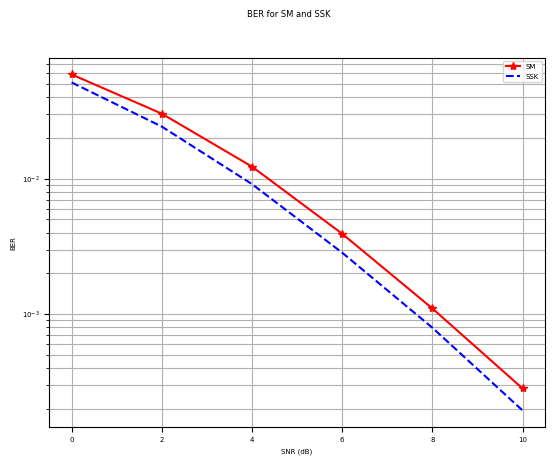

In [2]:
import numpy as np
import numpy.linalg as nl
import numpy.random as nr
import matplotlib.pyplot as plt
import numpy.matlib as nm

#In SM, only one antenna is active
#The choicce of active antenna is made using log2Nt bits

SNRdB = np.arange(0,11,2);
iter = 100000;
Nt = 4; Nr = 4;
M = 2;
bpcu_spatial = np.log2(Nt) + np.log2(M);
bpcu_ssk = np.log2(Nt)

BERopt_spatial = np.zeros(len(SNRdB));
BERopt_ssk = np.zeros(len(SNRdB));
for ite in range(iter):
    H = (nr.normal(0,1,(Nr,Nt))+ 1j*nr.normal(0,1,(Nr,Nt)))/np.sqrt(2)
    N = (nr.normal(0,1,(Nr,1))+ 1j*nr.normal(0,1,(Nr,1)))/np.sqrt(2)
    # Y= root(P)HX + N --> system model
    #H-  channel coefficient matrix
    #N - random noise vector
    isym = nr.randint(2**bpcu_spatial)
    antIndex_spatial = isym % 4;
    antIndex_ssk = nr.randint(2*bpcu_ssk)
    X = 2*(isym > 3)-1#Transmitted symbols
    #Spatial modulation
    for k in range(len(SNRdB)):
        P_spatial = 10**(SNRdB[k]/10)
        Y_spatial = np.sqrt(P_spatial)*H[:,antIndex_spatial:antIndex_spatial+1]*X + N
        #Optimal decoder = min || Y - S ||^2
        # S - contains all possibilities of BPSK symbols
        opt_dec_spatial = np.argmin(np.sum(np.absolute(np.sqrt(P_spatial)*np.concatenate((-H,H), axis = 1) - nm.repmat(Y_spatial, 1, 2*Nt))**2,axis=0))
        BERopt_spatial[k] = BERopt_spatial[k] + (opt_dec_spatial != isym)

    #SSK modulation
    for k in range(len(SNRdB)):
        P_ssk = 10**(SNRdB[k]/10)
        Y = np.sqrt(P_ssk)*H[:,antIndex_ssk:antIndex_ssk+1] + N
        opt_dec = np.argmin(np.sum(np.absolute(np.sqrt(P_ssk)*H - nm.repmat(Y, 1, Nt))**2,axis=0))
        BERopt_ssk[k] = BERopt_ssk[k] + (opt_dec != antIndex_ssk)
BERopt_ssk = BERopt_ssk/(bpcu_ssk*iter)
BERopt_spatial = BERopt_spatial/(bpcu_spatial*iter)

plt.yscale('log')
plt.plot(SNRdB, BERopt_spatial,'r-*', label= 'SM');
plt.plot(SNRdB, BERopt_ssk,'b--', label= 'SSK');
plt.grid(1,which='both')
plt.suptitle('BER for SM and SSK')
plt.legend()
plt.xlabel('SNR (dB)')
plt.ylabel('BER')

*Observation: The channel capacity of AWGN > capacity of SIMO > capacity of SISO and the capacity increases with increase in SNR in all the cases. So, as number of antennas increases the capacity increases and the AWGN channel has highest SNR.*